In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_path = "covid_death.csv"
data = pd.read_csv(dataset_path)

In [4]:
print("Initial Dataset Preview:\n", data.head())
print("\nDataset Info:")
data.info()

Initial Dataset Preview:
      country     region  region_code  start_date    end_date  days  year  \
0  Australia  Australia            0  2019-12-30  2020-01-05     7  2020   
1  Australia  Australia            0  2020-01-06  2020-01-12     7  2020   
2  Australia  Australia            0  2020-01-13  2020-01-19     7  2020   
3  Australia  Australia            0  2020-01-20  2020-01-26     7  2020   
4  Australia  Australia            0  2020-01-27  2020-02-02     7  2020   

   week  population  total_deaths  covid_deaths  expected_deaths  \
0     1    25921089        2926.0             0      2965.372893   
1     2    25921089        2902.0             0      2956.539560   
2     3    25921089        2914.0             0      2932.039560   
3     4    25921089        3007.0             0      2940.372893   
4     5    25921089        2910.0             0      2900.039560   

   excess_deaths  non_covid_deaths  covid_deaths_per_100k  \
0     -39.372893            2926.0             

In [5]:
# Handling missing values
data = data.dropna()  # Drop rows with missing values

In [6]:
# Convert date columns to datetime format
data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date'] = pd.to_datetime(data['end_date'])

In [7]:
#Line chart of COVID-19 deaths over time for a United States
country_filter = "United States"
country_data = data[data['country'] == country_filter]

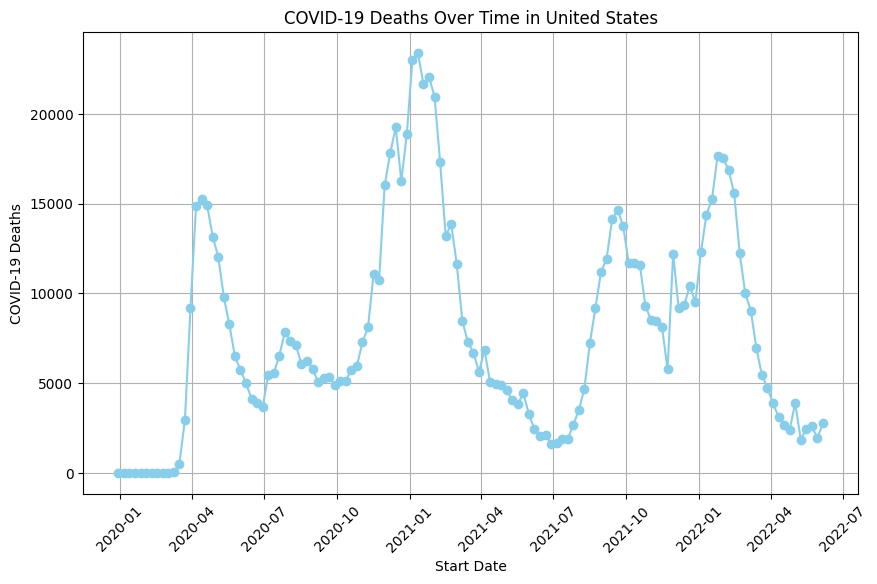

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(country_data['start_date'], country_data['covid_deaths'], marker='o', color='skyblue')
plt.title(f"COVID-19 Deaths Over Time in {country_filter}")
plt.xlabel("Start Date")
plt.ylabel("COVID-19 Deaths")
plt.xticks(rotation=45)
plt.grid()
plt.show()

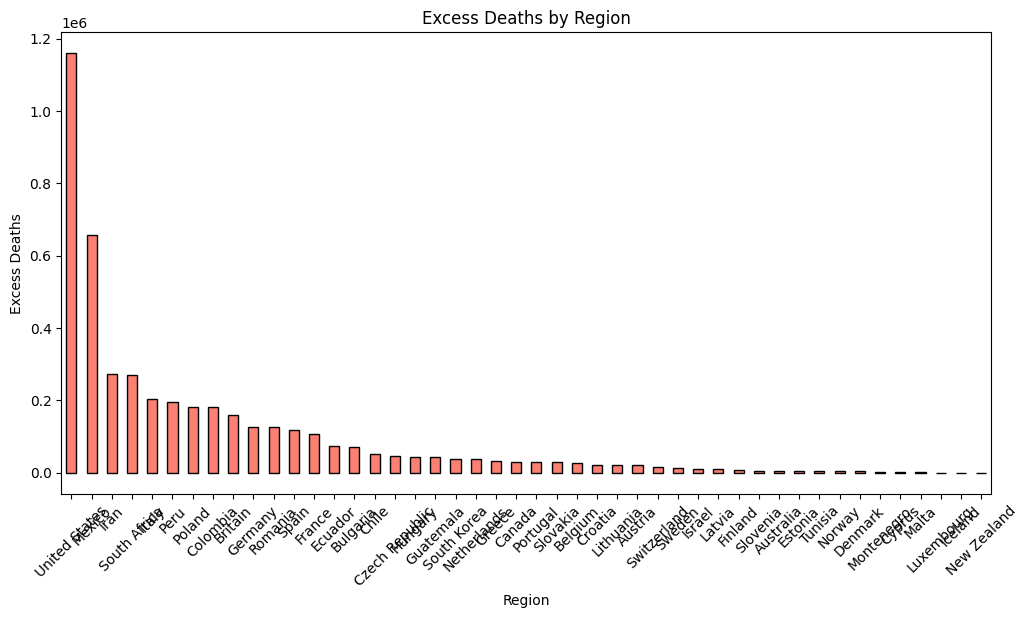

In [9]:
#Bar chart of excess deaths per region
plt.figure(figsize=(12, 6))
region_excess_deaths = data.groupby('region')['excess_deaths'].sum().sort_values(ascending=False)
region_excess_deaths.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Excess Deaths by Region")
plt.xlabel("Region")
plt.ylabel("Excess Deaths")
plt.xticks(rotation=45)
plt.show()

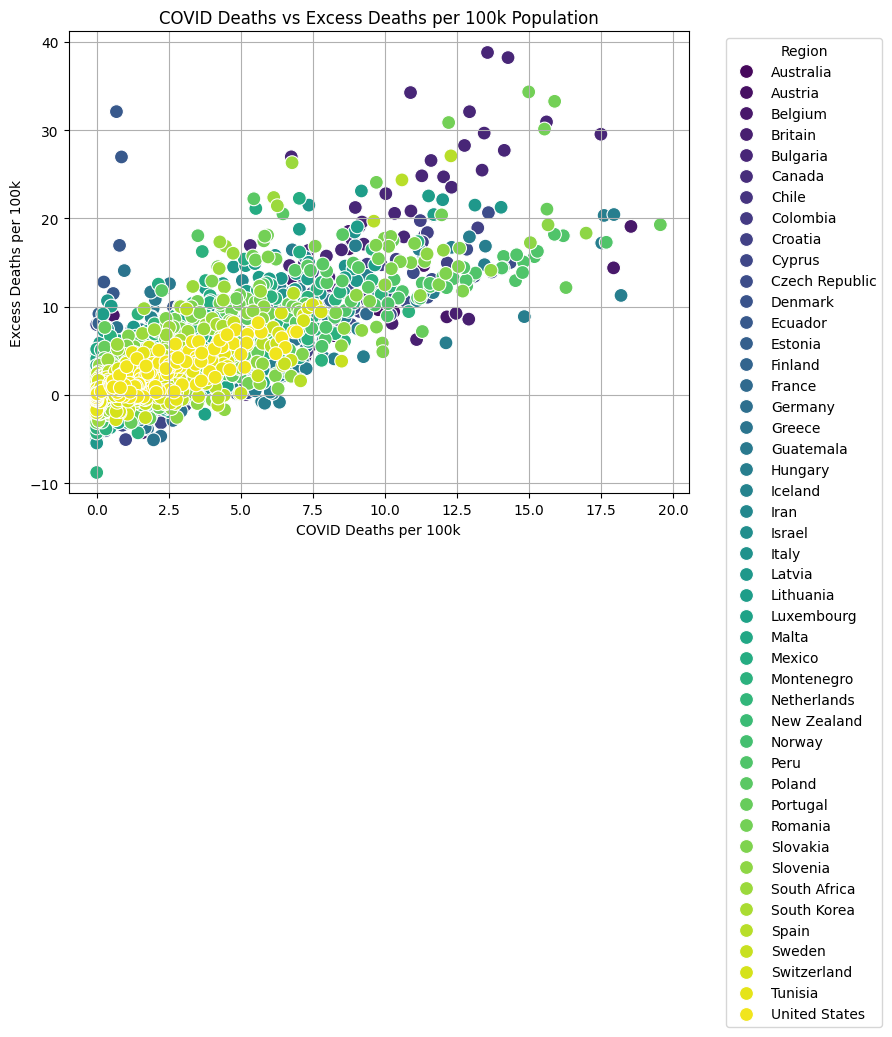

In [10]:
#Scatter plot of COVID deaths vs. excess deaths per 100k population
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['covid_deaths_per_100k'],
    y=data['excess_deaths_per_100k'],
    hue=data['region'],
    palette='viridis',
    s=100
)
plt.title("COVID Deaths vs Excess Deaths per 100k Population")
plt.xlabel("COVID Deaths per 100k")
plt.ylabel("Excess Deaths per 100k")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [11]:
data.to_csv("cleaned_covid_death.csv", index=False)
print("Data cleaning and visualization completed. Cleaned data saved as 'cleaned_covid_death.csv'.")

Data cleaning and visualization completed. Cleaned data saved as 'cleaned_covid_death.csv'.
